In [1]:
import pandas as pd

business_json_path = 'business.json'
df_b = pd.read_json(business_json_path, lines=True)

FileNotFoundError: File business.json does not exist

In [5]:
df_b = df_b[df_b['is_open']==1]

In [6]:
drop_columns = ['hours','is_open','review_count']
df_b = df_b.drop(drop_columns, axis=1)

In [7]:
business_american = df_b[df_b['categories'].str.contains('American',case=False, na=False)]

In [8]:
business_american_pa = business_american[business_american['state'].str.contains('PA',case=False, na=False)]

In [9]:
df_explode = business_american_pa.assign(categories = business_american_pa.categories.str.split(', ')).explode('categories')

In [10]:
df_explode[df_explode.categories.str.contains('American ',case=True,na=False)].categories.value_counts()

American (Traditional)    1196
American (New)             842
Name: categories, dtype: int64

In [9]:
review_json_path = 'review.json'

In [10]:
size = 1000000
review = pd.read_json(review_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

In [11]:
chunk_list = []
for chunk_review in review:
    chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis=1)
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    chunk_merged = pd.merge(business_american_pa, chunk_review, on='business_id', how='inner')
    chunk_list.append(chunk_merged)
df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

In [12]:
csv_name = "yelp_reviews_RV_categories.csv"
df.to_csv(csv_name, index=False)

In [2]:
df = pd.read_csv("yelp_reviews_American_PA.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'yelp_reviews_American_PA.csv'

In [4]:
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,categories,user_id,review_stars,text,date
0,xJyp6RLqNRv3tSu6njPKxQ,World of Beer,"102 Main St, Ste 100",Exton,PA,19341,40.023665,-75.629188,3.0,"{'BusinessParking': ""{'garage': False, 'street...","Nightlife, Pubs, American (Traditional), Resta...",LEyRdfEh33INkU_qK3-FAQ,3,"Fun place, inviting interior and a pleasure to...",2016-10-01 18:29:23
1,xJyp6RLqNRv3tSu6njPKxQ,World of Beer,"102 Main St, Ste 100",Exton,PA,19341,40.023665,-75.629188,3.0,"{'BusinessParking': ""{'garage': False, 'street...","Nightlife, Pubs, American (Traditional), Resta...",A4zJjICASd882ijLCLCo6g,4,"If you're a beer snob, this is definitely a pl...",2017-10-03 20:24:28
2,xJyp6RLqNRv3tSu6njPKxQ,World of Beer,"102 Main St, Ste 100",Exton,PA,19341,40.023665,-75.629188,3.0,"{'BusinessParking': ""{'garage': False, 'street...","Nightlife, Pubs, American (Traditional), Resta...",YftKeBGd7sZNNqQaC5JK2g,5,I love love love World of Beer! I have been to...,2017-02-09 10:01:19
3,xJyp6RLqNRv3tSu6njPKxQ,World of Beer,"102 Main St, Ste 100",Exton,PA,19341,40.023665,-75.629188,3.0,"{'BusinessParking': ""{'garage': False, 'street...","Nightlife, Pubs, American (Traditional), Resta...",VzlxldiIRMYnKEy05RfEzQ,5,Great beer and service! The servers have to ta...,2017-09-20 21:37:43
4,xJyp6RLqNRv3tSu6njPKxQ,World of Beer,"102 Main St, Ste 100",Exton,PA,19341,40.023665,-75.629188,3.0,"{'BusinessParking': ""{'garage': False, 'street...","Nightlife, Pubs, American (Traditional), Resta...",We9czX_AL0G2GdpjRTiNXQ,4,Atmosphere is casual. Indoor and outdoor seati...,2018-06-19 20:42:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286243,K1SsvIPfFcHniNSPc3IG7g,Flip-N-Pizza,1308 W Girard Ave,Philadelphia,PA,19123,39.970720,-75.157752,4.0,"{'WiFi': ""u'no'"", 'BYOB': 'False', 'Restaurant...","Restaurants, American (Traditional), Chicken W...",Gy-yRJpXdSpOVreHocEGWw,4,Pizza was good and they gave a great discount ...,2021-11-22 18:27:36
286244,K1SsvIPfFcHniNSPc3IG7g,Flip-N-Pizza,1308 W Girard Ave,Philadelphia,PA,19123,39.970720,-75.157752,4.0,"{'WiFi': ""u'no'"", 'BYOB': 'False', 'Restaurant...","Restaurants, American (Traditional), Chicken W...",3KkiGGMlWe8eCbb0Wtir_w,5,My order was delicious! I was a bit hesitant s...,2021-08-17 23:14:37
286245,K1SsvIPfFcHniNSPc3IG7g,Flip-N-Pizza,1308 W Girard Ave,Philadelphia,PA,19123,39.970720,-75.157752,4.0,"{'WiFi': ""u'no'"", 'BYOB': 'False', 'Restaurant...","Restaurants, American (Traditional), Chicken W...",XSOdhb9CE747hrmY8cR0NQ,5,Ordered here for the first time. I did a peppe...,2021-10-27 13:55:05
286246,K1SsvIPfFcHniNSPc3IG7g,Flip-N-Pizza,1308 W Girard Ave,Philadelphia,PA,19123,39.970720,-75.157752,4.0,"{'WiFi': ""u'no'"", 'BYOB': 'False', 'Restaurant...","Restaurants, American (Traditional), Chicken W...",WLaCTpXXdrFKlUTXDsp6Tg,5,"When it comes to pizza, the dough is everythin...",2021-05-19 16:19:46


In [3]:
import pandas as pd
file_path = 'C:/Users/lyr00/Desktop/yelp_reviews_RV_categories.csv'
df = pd.read_csv(file_path)

C:\Users\lyr00\AppData\Local\Temp\ipykernel_11432\2439981141.py:3: DtypeWarning: Columns (11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


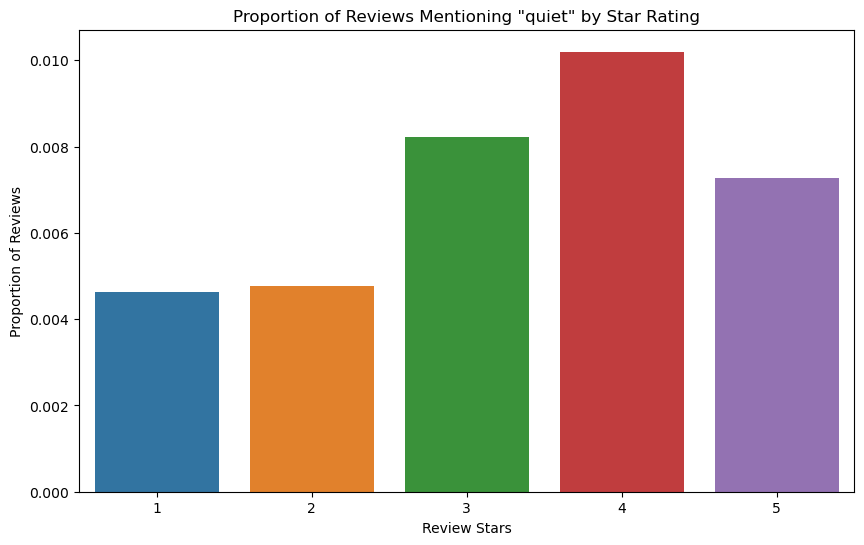

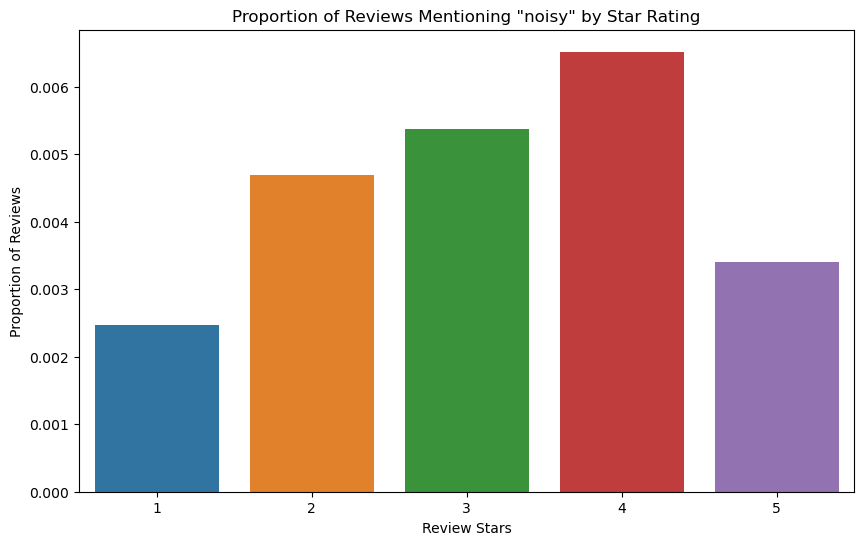

In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is a DataFrame named df with columns 'text' and 'review_stars'
# Data Cleaning
df['text'] = df['text'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# Tokenization
nltk.download('punkt')
df['tokens'] = df['text'].apply(nltk.word_tokenize)

# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiments'] = df['text'].apply(lambda x: sia.polarity_scores(x))

# Define food_words
food_words = ['quiet', 'noisy']

# Process and plot for each word
for word in food_words:
    # Create a column for each word indicating its presence in the review
    df[word] = df['tokens'].apply(lambda tokens: word in tokens)

    # Group by review_stars and calculate the proportion
    proportions = df.groupby('review_stars')[word].mean().reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='review_stars', y=word, data=proportions)
    plt.title(f'Proportion of Reviews Mentioning "{word}" by Star Rating')
    plt.xlabel('Review Stars')
    plt.ylabel('Proportion of Reviews')
    plt.show()


In [4]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is a DataFrame named df with columns 'text' and 'review_stars'
# Data Cleaning
df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# Tokenization and Phrase Detection
nltk.download('punkt')
df['tokens'] = df['text'].apply(nltk.word_tokenize)
phrases = Phrases(df['tokens'], min_count=5, threshold=10)
bigram = Phraser(phrases)
df['phrases'] = df['tokens'].apply(lambda tokens: bigram[tokens])

# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Topic Modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['text'])
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(dtm)

# Visualization of Topics
for index, topic in enumerate(lda.components_):
    print(f'Top 10 words for topic #{index}')
    # Use get_feature_names_out() instead of get_feature_names()
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


# Correlation Analysis
# This part requires statistical analysis to find correlation between topics/sentiment and review_stars

# Visualization
# Use seaborn or matplotlib to visualize your findings


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Top 10 words for topic #0
['dont', 'steak', 'like', 'just', 'good', 'cheesesteak', 'place', 'philly', 'sandwich', 'cheese']


Top 10 words for topic #1
['best', 'amazing', 'breakfast', 'delicious', 'place', 'good', 'service', 'brunch', 'great', 'food']


Top 10 words for topic #2
['got', 'sauce', 'cheese', 'like', 'burger', 'delicious', 'really', 'ordered', 'chicken', 'good']


Top 10 words for topic #3
['service', 'nice', 'really', 'drinks', 'beer', 'bar', 'good', 'place', 'food', 'great']


Top 10 words for topic #4
['like', 'didnt', 'minutes', 'came', 'order', 'table', 'just', 'time', 'service', 'food']




Correlation between average sentiment and review stars: 0.8958202515279361
Correlation between dominant topic and review stars: -0.4689009016241866


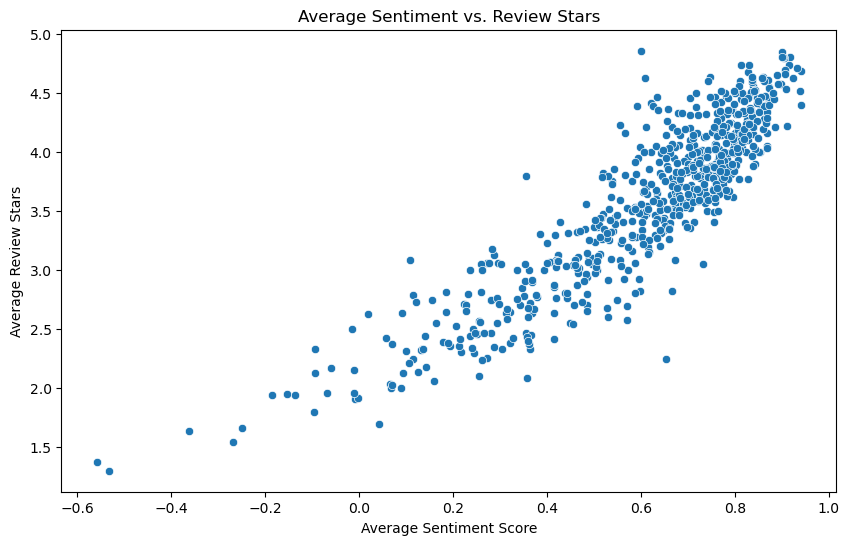

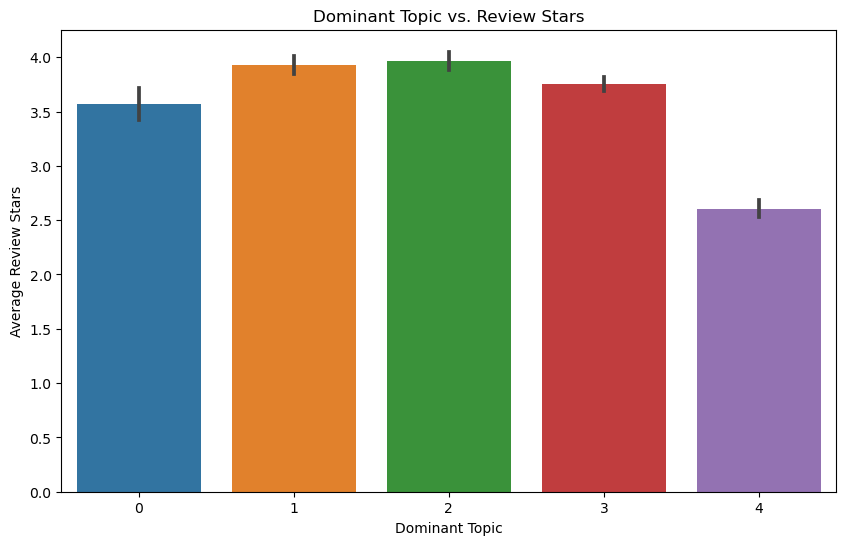

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign each document to the topic that has the highest probability
topic_results = lda.transform(dtm)
df['topic'] = topic_results.argmax(axis=1)

# Calculate average sentiment score and dominant topic for each business_id
# Assuming there's a 'business_id' column in your DataFrame
business_avg = df.groupby('business_id').agg({'sentiment': 'mean', 'topic': lambda x: x.mode()[0], 'review_stars': 'mean'}).reset_index()

# Correlation Analysis
# Calculate the correlation between average sentiment, dominant topic, and review stars
correlation_sentiment = pearsonr(business_avg['sentiment'], business_avg['review_stars'])
correlation_topic = pearsonr(business_avg['topic'], business_avg['review_stars'])

print(f"Correlation between average sentiment and review stars: {correlation_sentiment[0]}")
print(f"Correlation between dominant topic and review stars: {correlation_topic[0]}")

# Visualization
# Scatter plot for sentiment vs. review stars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='review_stars', data=business_avg)
plt.title('Average Sentiment vs. Review Stars')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Average Review Stars')
plt.show()

# Bar plot for dominant topic vs. review stars
plt.figure(figsize=(10, 6))
sns.barplot(x='topic', y='review_stars', data=business_avg)
plt.title('Dominant Topic vs. Review Stars')
plt.xlabel('Dominant Topic')
plt.ylabel('Average Review Stars')
plt.show()


In [7]:
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Custom stopwords list
custom_stopwords = set(stopwords.words('english')) | {'good', 'like', 'just', 'really', 'didnt', 'dont','nice', 'amazing','got', 'place', 'philly','great','food','delicious', 'came', 'order', 'table'}

# Convert custom stopwords set to a list
custom_stopwords_list = list(custom_stopwords)

# Vectorization focusing on nouns
vectorizer = CountVectorizer(max_df=0.90, min_df=10, stop_words=custom_stopwords_list)
dtm = vectorizer.fit_transform([' '.join(nouns) for nouns in df['nouns']])
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(dtm)

# Visualization of Topics
for index, topic in enumerate(lda.components_):
    print(f'Top 10 words for topic #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 words for topic #0
['side', 'wait', 'menu', 'time', 'eggs', 'toast', 'coffee', 'service', 'breakfast', 'brunch']


Top 10 words for topic #1
['experience', 'dish', 'time', 'dessert', 'salad', 'meal', 'dinner', 'menu', 'service', 'restaurant']


Top 10 words for topic #2
['experience', 'restaurant', 'staff', 'minutes', 'night', 'people', 'drinks', 'bar', 'time', 'service']


Top 10 words for topic #3
['service', 'hour', 'wings', 'beers', 'menu', 'selection', 'fries', 'burger', 'bar', 'beer']


Top 10 words for topic #4
['line', 'time', 'meat', 'cheese', 'pork', 'steak', 'cheesesteak', 'fries', 'chicken', 'sandwich']




Correlation between average sentiment and review stars: 0.8958202515279361
Correlation between dominant topic and review stars: -0.19453411290123


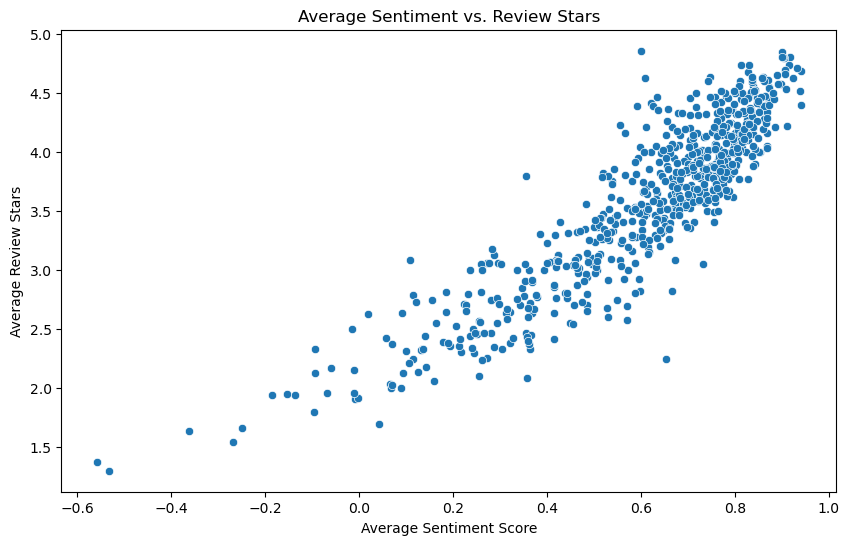

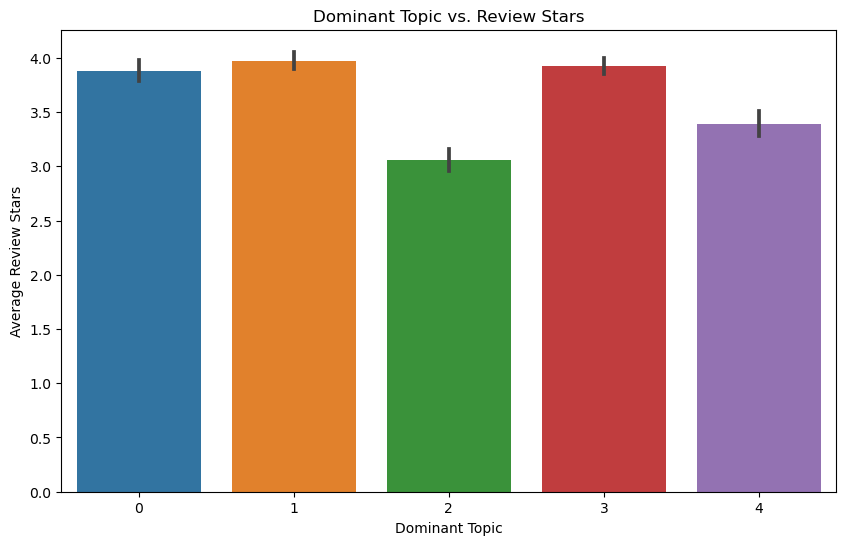

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign each document to the topic that has the highest probability
topic_results = lda.transform(dtm)
df['topic'] = topic_results.argmax(axis=1)

# Calculate average sentiment score and dominant topic for each business_id
# Assuming there's a 'business_id' column in your DataFrame
business_avg = df.groupby('business_id').agg({'sentiment': 'mean', 'topic': lambda x: x.mode()[0], 'review_stars': 'mean'}).reset_index()

# Correlation Analysis
# Calculate the correlation between average sentiment, dominant topic, and review stars
correlation_sentiment = pearsonr(business_avg['sentiment'], business_avg['review_stars'])
correlation_topic = pearsonr(business_avg['topic'], business_avg['review_stars'])

print(f"Correlation between average sentiment and review stars: {correlation_sentiment[0]}")
print(f"Correlation between dominant topic and review stars: {correlation_topic[0]}")

# Visualization
# Scatter plot for sentiment vs. review stars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='review_stars', data=business_avg)
plt.title('Average Sentiment vs. Review Stars')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Average Review Stars')
plt.show()

# Bar plot for dominant topic vs. review stars
plt.figure(figsize=(10, 6))
sns.barplot(x='topic', y='review_stars', data=business_avg)
plt.title('Dominant Topic vs. Review Stars')
plt.xlabel('Dominant Topic')
plt.ylabel('Average Review Stars')
plt.show()


In [9]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 和 'review_stars' 列
# 数据清洗
df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 筛选包含 'chicken' 的评论
chicken_reviews = df[df['text'].str.contains('chicken')]

# 计算平均情感分数和方差
average_sentiment = chicken_reviews['sentiment'].mean()
variance_sentiment = chicken_reviews['sentiment'].var()

print(f"Average Sentiment Score: {average_sentiment}")
print(f"Variance of Sentiment Score: {variance_sentiment}")

# 相关性分析
correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])

print(f"Correlation between Sentiment Score and Review Stars: {correlation}")
print(f"P-value: {p_value}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average Sentiment Score: 0.7646362788791558
Variance of Sentiment Score: 0.21204398690713688
Correlation between Sentiment Score and Review Stars: 0.5622138616950852
P-value: 0.0


In [10]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats
# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 筛选包含 'chicken' 的评论
chicken_reviews = df[df['text'].str.contains('steak')]

# 计算平均情感分数和方差
average_sentiment = chicken_reviews['sentiment'].mean()
variance_sentiment = chicken_reviews['sentiment'].var()

print(f"Average Sentiment Score: {average_sentiment}")
print(f"Variance of Sentiment Score: {variance_sentiment}")

# 相关性分析
correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])

print(f"Correlation between Sentiment Score and Review Stars: {correlation}")
print(f"P-value: {p_value}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average Sentiment Score: 0.7096714911496513
Variance of Sentiment Score: 0.22709762481592619
Correlation between Sentiment Score and Review Stars: 0.5009952511227874
P-value: 0.0


In [11]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 和 'review_stars' 列
# 数据清洗
df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 定义分析函数
def analyze_chicken_reviews(reviews):
    chicken_reviews = reviews[reviews['text'].str.contains('chicken')]
    average_sentiment = chicken_reviews['sentiment'].mean()
    variance_sentiment = chicken_reviews['sentiment'].var()
    correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])
    return average_sentiment, variance_sentiment, correlation, p_value

# 分割数据集
high_rating_reviews = df[df['review_stars'].between(4, 5)]
low_rating_reviews = df[df['review_stars'].between(1, 3)]

# 分析高评分评论
high_avg, high_var, high_corr, high_p = analyze_chicken_reviews(high_rating_reviews)
print("High Rating Reviews:")
print(f"Average Sentiment Score: {high_avg}")
print(f"Variance of Sentiment Score: {high_var}")
print(f"Correlation: {high_corr}, P-value: {high_p}")

# 分析低评分评论
low_avg, low_var, low_corr, low_p = analyze_chicken_reviews(low_rating_reviews)
print("\nLow Rating Reviews:")
print(f"Average Sentiment Score: {low_avg}")
print(f"Variance of Sentiment Score: {low_var}")
print(f"Correlation: {low_corr}, P-value: {low_p}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


High Rating Reviews:
Average Sentiment Score: 0.9075399245171316
Variance of Sentiment Score: 0.03903136089925407
Correlation: 0.04696008328620565, P-value: 4.72386377981036e-08

Low Rating Reviews:
Average Sentiment Score: 0.4432220039946738
Variance of Sentiment Score: 0.451986436199612
Correlation: 0.5131507640889048, P-value: 0.0


In [12]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 和 'review_stars' 列
# 数据清洗
df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 定义分析函数
def analyze_chicken_reviews(reviews):
    chicken_reviews = reviews[reviews['text'].str.contains('steak')]
    average_sentiment = chicken_reviews['sentiment'].mean()
    variance_sentiment = chicken_reviews['sentiment'].var()
    correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])
    return average_sentiment, variance_sentiment, correlation, p_value

# 分割数据集
high_rating_reviews = df[df['review_stars'].between(4, 5)]
low_rating_reviews = df[df['review_stars'].between(1, 3)]

# 分析高评分评论
high_avg, high_var, high_corr, high_p = analyze_chicken_reviews(high_rating_reviews)
print("High Rating Reviews:")
print(f"Average Sentiment Score: {high_avg}")
print(f"Variance of Sentiment Score: {high_var}")
print(f"Correlation: {high_corr}, P-value: {high_p}")

# 分析低评分评论
low_avg, low_var, low_corr, low_p = analyze_chicken_reviews(low_rating_reviews)
print("\nLow Rating Reviews:")
print(f"Average Sentiment Score: {low_avg}")
print(f"Variance of Sentiment Score: {low_var}")
print(f"Correlation: {low_corr}, P-value: {low_p}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


High Rating Reviews:
Average Sentiment Score: 0.8540965507985506
Variance of Sentiment Score: 0.06999550944250055
Correlation: 0.048646114144257124, P-value: 2.825415348405418e-09

Low Rating Reviews:
Average Sentiment Score: 0.42155606425702813
Variance of Sentiment Score: 0.41591573493108736
Correlation: 0.41735235765943346, P-value: 9.7441450451e-313


In [13]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats
# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 筛选包含 'chicken' 的评论
chicken_reviews = df[df['text'].str.contains('burger')]
chicken_reviews_count = len(df[df['text'].str.contains('burger')])
print(f"Number of reviews containing 'chicken': {chicken_reviews_count}")

# 计算平均情感分数和方差
average_sentiment = chicken_reviews['sentiment'].mean()
variance_sentiment = chicken_reviews['sentiment'].var()

print(f"Average Sentiment Score: {average_sentiment}")
print(f"Variance of Sentiment Score: {variance_sentiment}")

# 相关性分析
correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])

print(f"Correlation between Sentiment Score and Review Stars: {correlation}")
print(f"P-value: {p_value}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of reviews containing 'chicken': 15567
Average Sentiment Score: 0.7571165863686002
Variance of Sentiment Score: 0.2060417491543999
Correlation between Sentiment Score and Review Stars: 0.5183744852073622
P-value: 0.0


In [14]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 和 'review_stars' 列
# 数据清洗
df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 定义分析函数
def analyze_chicken_reviews(reviews):
    chicken_reviews = reviews[reviews['text'].str.contains('burger')]
    average_sentiment = chicken_reviews['sentiment'].mean()
    variance_sentiment = chicken_reviews['sentiment'].var()
    correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])
    return average_sentiment, variance_sentiment, correlation, p_value

# 分割数据集
high_rating_reviews = df[df['review_stars'].between(4, 5)]
low_rating_reviews = df[df['review_stars'].between(1, 3)]

# 分析高评分评论
high_avg, high_var, high_corr, high_p = analyze_chicken_reviews(high_rating_reviews)
print("High Rating Reviews:")
print(f"Average Sentiment Score: {high_avg}")
print(f"Variance of Sentiment Score: {high_var}")
print(f"Correlation: {high_corr}, P-value: {high_p}")

# 分析低评分评论
low_avg, low_var, low_corr, low_p = analyze_chicken_reviews(low_rating_reviews)
print("\nLow Rating Reviews:")
print(f"Average Sentiment Score: {low_avg}")
print(f"Variance of Sentiment Score: {low_var}")
print(f"Correlation: {low_corr}, P-value: {low_p}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


High Rating Reviews:
Average Sentiment Score: 0.8967640698587127
Variance of Sentiment Score: 0.047408456797407204
Correlation: 0.05730513027099894, P-value: 7.067519850398302e-09

Low Rating Reviews:
Average Sentiment Score: 0.49231897674418607
Variance of Sentiment Score: 0.39978875688581395
Correlation: 0.4663497918792423, P-value: 1.7384105987745816e-288


In [15]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats
# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 筛选包含 'chicken' 的评论
chicken_reviews = df[df['text'].str.contains('sandwich')]
chicken_reviews_count = len(chicken_reviews)
print(f"Number of reviews containing 'chicken': {chicken_reviews_count}")

# 计算平均情感分数和方差
average_sentiment = chicken_reviews['sentiment'].mean()
variance_sentiment = chicken_reviews['sentiment'].var()

print(f"Average Sentiment Score: {average_sentiment}")
print(f"Variance of Sentiment Score: {variance_sentiment}")

# 相关性分析
correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])

print(f"Correlation between Sentiment Score and Review Stars: {correlation}")
print(f"P-value: {p_value}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of reviews containing 'chicken': 18333
Average Sentiment Score: 0.7392863742977145
Variance of Sentiment Score: 0.21213808410846216
Correlation between Sentiment Score and Review Stars: 0.5000290399569705
P-value: 0.0


In [16]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 和 'review_stars' 列
# 数据清洗
df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 定义分析函数
def analyze_chicken_reviews(reviews):
    chicken_reviews = reviews[reviews['text'].str.contains('sandwich')]
    average_sentiment = chicken_reviews['sentiment'].mean()
    variance_sentiment = chicken_reviews['sentiment'].var()
    correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])
    return average_sentiment, variance_sentiment, correlation, p_value

# 分割数据集
high_rating_reviews = df[df['review_stars'].between(4, 5)]
low_rating_reviews = df[df['review_stars'].between(1, 3)]

# 分析高评分评论
high_avg, high_var, high_corr, high_p = analyze_chicken_reviews(high_rating_reviews)
print("High Rating Reviews:")
print(f"Average Sentiment Score: {high_avg}")
print(f"Variance of Sentiment Score: {high_var}")
print(f"Correlation: {high_corr}, P-value: {high_p}")

# 分析低评分评论
low_avg, low_var, low_corr, low_p = analyze_chicken_reviews(low_rating_reviews)
print("\nLow Rating Reviews:")
print(f"Average Sentiment Score: {low_avg}")
print(f"Variance of Sentiment Score: {low_var}")
print(f"Correlation: {low_corr}, P-value: {low_p}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


High Rating Reviews:
Average Sentiment Score: 0.8742176148267526
Variance of Sentiment Score: 0.059849068787927354
Correlation: 0.02491370731849397, P-value: 0.005510966655554308

Low Rating Reviews:
Average Sentiment Score: 0.45657546851257813
Variance of Sentiment Score: 0.4131894410006042
Correlation: 0.4394416551093632, P-value: 3.147708682384303e-278


In [17]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats
# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 筛选包含 'chicken' 的评论
chicken_reviews = df[df['text'].str.contains('brunch')]
chicken_reviews_count = len(chicken_reviews)
print(f"Number of reviews containing 'chicken': {chicken_reviews_count}")

# 计算平均情感分数和方差
average_sentiment = chicken_reviews['sentiment'].mean()
variance_sentiment = chicken_reviews['sentiment'].var()

print(f"Average Sentiment Score: {average_sentiment}")
print(f"Variance of Sentiment Score: {variance_sentiment}")

# 相关性分析
correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])

print(f"Correlation between Sentiment Score and Review Stars: {correlation}")
print(f"P-value: {p_value}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of reviews containing 'chicken': 16062
Average Sentiment Score: 0.8322158386253269
Variance of Sentiment Score: 0.1297603152313451
Correlation between Sentiment Score and Review Stars: 0.46653751399130683
P-value: 0.0


In [18]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 和 'review_stars' 列
# 数据清洗
df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 定义分析函数
def analyze_chicken_reviews(reviews):
    chicken_reviews = reviews[reviews['text'].str.contains('brunch')]
    average_sentiment = chicken_reviews['sentiment'].mean()
    variance_sentiment = chicken_reviews['sentiment'].var()
    correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])
    return average_sentiment, variance_sentiment, correlation, p_value

# 分割数据集
high_rating_reviews = df[df['review_stars'].between(4, 5)]
low_rating_reviews = df[df['review_stars'].between(1, 3)]

# 分析高评分评论
high_avg, high_var, high_corr, high_p = analyze_chicken_reviews(high_rating_reviews)
print("High Rating Reviews:")
print(f"Average Sentiment Score: {high_avg}")
print(f"Variance of Sentiment Score: {high_var}")
print(f"Correlation: {high_corr}, P-value: {high_p}")

# 分析低评分评论
low_avg, low_var, low_corr, low_p = analyze_chicken_reviews(low_rating_reviews)
print("\nLow Rating Reviews:")
print(f"Average Sentiment Score: {low_avg}")
print(f"Variance of Sentiment Score: {low_var}")
print(f"Correlation: {low_corr}, P-value: {low_p}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


High Rating Reviews:
Average Sentiment Score: 0.9103499118872157
Variance of Sentiment Score: 0.035301118419442674
Correlation: 0.04846956102019544, P-value: 6.019042320757867e-08

Low Rating Reviews:
Average Sentiment Score: 0.5595982392397988
Variance of Sentiment Score: 0.3637920998375468
Correlation: 0.43522577417983394, P-value: 2.57992045742846e-165


In [19]:
import pandas as pd

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 和 'review_stars' 列

# 创建包含 'brunch' 的评论子集
brunch_reviews = df[df['text'].str.contains('brunch')]

# 创建不包含 'brunch' 的评论子集
no_brunch_reviews = df[~df['text'].str.contains('brunch')]

# 计算包含 'brunch' 的评论的平均 'review_stars'
average_stars_brunch = brunch_reviews['review_stars'].mean()

# 计算不包含 'brunch' 的评论的平均 'review_stars'
average_stars_no_brunch = no_brunch_reviews['review_stars'].mean()

# 打印结果
print(f"Average review stars for reviews containing 'brunch': {average_stars_brunch}")
print(f"Average review stars for reviews not containing 'brunch': {average_stars_no_brunch}")


Average review stars for reviews containing 'brunch': 4.075395343045698
Average review stars for reviews not containing 'brunch': 3.760829577853398


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 列

# 筛选包含 'brunch' 的评论
brunch_reviews = df[df['text'].str.contains('brunch', case=False, na=False)]

# 使用 TF-IDF 对文本进行向量化
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_matrix = tfidf_vectorizer.fit_transform(brunch_reviews['text'])

# 获取每个词的 TF-IDF 分数
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_scores_dict = dict(zip(feature_names, tfidf_scores))

# 按 TF-IDF 分数排序并展示前10个词
sorted_tfidf = sorted(tfidf_scores_dict.items(), key=lambda x: x[1], reverse=True)
for word, score in sorted_tfidf[:40]:  # 展示前10个词，可以调整数量
    print(f"{word.title()}: TF-IDF Score = {score:.4f}")


Food: TF-IDF Score = 566.5897
Great: TF-IDF Score = 542.6770
Good: TF-IDF Score = 515.6941
Place: TF-IDF Score = 494.7127
Service: TF-IDF Score = 370.0563
Wait: TF-IDF Score = 338.0672
Menu: TF-IDF Score = 336.5652
Really: TF-IDF Score = 334.4314
Delicious: TF-IDF Score = 329.2576
Time: TF-IDF Score = 321.7120
Just: TF-IDF Score = 317.9956
Like: TF-IDF Score = 309.5245
Eggs: TF-IDF Score = 301.6896
Got: TF-IDF Score = 290.8180
Toast: TF-IDF Score = 287.4623
Definitely: TF-IDF Score = 286.7165
Came: TF-IDF Score = 285.0998
French: TF-IDF Score = 277.1723
Ordered: TF-IDF Score = 275.8756
Amazing: TF-IDF Score = 273.6795
Nice: TF-IDF Score = 260.1425
Ive: TF-IDF Score = 259.0155
Spot: TF-IDF Score = 256.0628
Breakfast: TF-IDF Score = 252.2510
Love: TF-IDF Score = 251.1366
Best: TF-IDF Score = 249.0251
Went: TF-IDF Score = 235.0241
Dinner: TF-IDF Score = 229.0426
Try: TF-IDF Score = 227.1907
Come: TF-IDF Score = 226.9305
Chicken: TF-IDF Score = 224.1632
Little: TF-IDF Score = 217.8704
Tabl

In [25]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import collections

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 列
# 确保已经下载了 NLTK 的相关资源
nltk.download('punkt')
nltk.download('stopwords')

# 筛选包含 'brunch' 的评论
brunch_reviews = df[df['text'].str.contains('brunch', case=False, na=False)]

# 分词
brunch_reviews['tokens'] = brunch_reviews['text'].apply(word_tokenize)

# 移除停用词和非字母字符
stop_words = set(stopwords.words('english'))
brunch_reviews['filtered_tokens'] = brunch_reviews['tokens'].apply(
    lambda tokens: [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
)

# 计算每个词的出现频率
word_counts = collections.Counter([word for sublist in brunch_reviews['filtered_tokens'] for word in sublist])

# 计算总评论数
total_reviews = len(brunch_reviews)

# 以百分比形式展示每个关键词的提及频率
for word, count in word_counts.most_common(50):  # 可以调整为需要的数量
    # 计算包含该词的评论数
    reviews_with_word = len(brunch_reviews[brunch_reviews['text'].str.contains(word, case=False, na=False)])
    print(f"{word.title()}: {reviews_with_word / total_reviews * 100:.2f}% of reviews")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\lyr00\AppData\Local\Temp\ipykernel_1772\1415370438.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunch_reviews['tokens'] = brunch_reviews['text'].apply(word_tokenize)
C:\Users\lyr00\AppData\Local\Temp\ipykernel_1772\1415370438.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Brunch: 100.00% of reviews
Food: 56.86% of reviews
Good: 44.49% of reviews
Place: 46.97% of reviews
Great: 42.39% of reviews
Like: 31.28% of reviews
One: 48.64% of reviews
Menu: 30.12% of reviews
Service: 34.66% of reviews
Time: 37.14% of reviews
Really: 25.87% of reviews
Also: 27.49% of reviews
Back: 30.51% of reviews
Get: 35.72% of reviews
Would: 27.34% of reviews
Wait: 38.86% of reviews
Delicious: 28.11% of reviews
Eggs: 22.62% of reviews
Came: 24.13% of reviews
Go: 71.45% of reviews
Ordered: 22.21% of reviews
Got: 25.13% of reviews
Us: 79.31% of reviews
Toast: 19.87% of reviews
Definitely: 21.84% of reviews
French: 18.34% of reviews
Ive: 49.92% of reviews
Nice: 21.00% of reviews
Well: 21.45% of reviews
Table: 25.31% of reviews
Breakfast: 19.44% of reviews
Try: 23.19% of reviews
Come: 23.00% of reviews
Im: 61.50% of reviews
Little: 16.95% of reviews
Went: 18.81% of reviews
Best: 18.20% of reviews
Love: 26.07% of reviews
Always: 15.29% of reviews
Restaurant: 18.68% of reviews
Amazing

In [26]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 152.1/152.1 kB 567.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


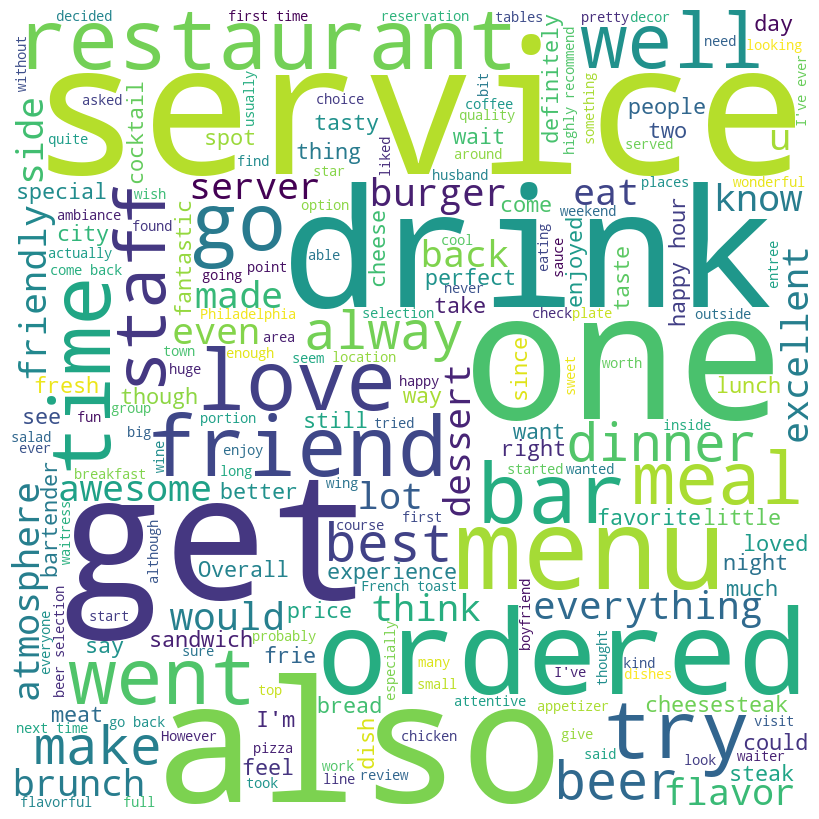

In [5]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# 确保已经下载了 NLTK 的相关资源
nltk.download('stopwords')

# 创建自定义停用词列表
custom_stopwords = set(stopwords.words('english')) | {'good', 'like', 'just', 'really', 'didnt', 'dont', 'nice', 'amazing', 'got', 'place', 'philly', 'great', 'food', 'delicious', 'came', 'order', 'table'，'restaurant','one','get','menu','ordered','bar','friend','also','try','eat','excellent','best','love','well','went','dinner','meal'}

# 分割数据集
high_rating_reviews = df[df['review_stars'].between(4, 5)]
low_rating_reviews = df[df['review_stars'].between(1, 3)]

# 定义生成词云的函数
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='white', 
                          stopwords = custom_stopwords, 
                          min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

# 生成高评分评论的词云
generate_wordcloud(' '.join(high_rating_reviews['text']))




In [9]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats
# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 筛选包含 'chicken' 的评论
chicken_reviews = df[df['text'].str.contains('service')]
chicken_reviews_count = len(chicken_reviews)
print(f"Number of reviews containing 'chicken': {chicken_reviews_count}")

# 计算平均情感分数和方差
average_sentiment = chicken_reviews['sentiment'].mean()
variance_sentiment = chicken_reviews['sentiment'].var()

print(f"Average Sentiment Score: {average_sentiment}")
print(f"Variance of Sentiment Score: {variance_sentiment}")

# 相关性分析
correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])

print(f"Correlation between Sentiment Score and Review Stars: {correlation}")
print(f"P-value: {p_value}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of reviews containing 'chicken': 42330
Average Sentiment Score: 0.7016660099220411
Variance of Sentiment Score: 0.2951157042418919
Correlation between Sentiment Score and Review Stars: 0.6215695250918103
P-value: 0.0


In [10]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 和 'review_stars' 列
# 数据清洗
df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 定义分析函数
def analyze_chicken_reviews(reviews):
    chicken_reviews = reviews[reviews['text'].str.contains('service')]
    average_sentiment = chicken_reviews['sentiment'].mean()
    variance_sentiment = chicken_reviews['sentiment'].var()
    correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])
    return average_sentiment, variance_sentiment, correlation, p_value

# 分割数据集
high_rating_reviews = df[df['review_stars'].between(4, 5)]
low_rating_reviews = df[df['review_stars'].between(1, 3)]

# 分析高评分评论
high_avg, high_var, high_corr, high_p = analyze_chicken_reviews(high_rating_reviews)
print("High Rating Reviews:")
print(f"Average Sentiment Score: {high_avg}")
print(f"Variance of Sentiment Score: {high_var}")
print(f"Correlation: {high_corr}, P-value: {high_p}")

# 分析低评分评论
low_avg, low_var, low_corr, low_p = analyze_chicken_reviews(low_rating_reviews)
print("\nLow Rating Reviews:")
print(f"Average Sentiment Score: {low_avg}")
print(f"Variance of Sentiment Score: {low_var}")
print(f"Correlation: {low_corr}, P-value: {low_p}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


High Rating Reviews:
Average Sentiment Score: 0.9087794708929452
Variance of Sentiment Score: 0.03626378632085695
Correlation: 0.07419074137710328, P-value: 8.037982828822511e-41

Low Rating Reviews:
Average Sentiment Score: 0.34728793778611217
Variance of Sentiment Score: 0.5027119830685017
Correlation: 0.5165751396025284, P-value: 0.0


In [11]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import collections

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 列
# 确保已经下载了 NLTK 的相关资源
nltk.download('punkt')
nltk.download('stopwords')

# 筛选包含 'brunch' 的评论
brunch_reviews = df[df['text'].str.contains('service', case=False, na=False)]

# 分词
brunch_reviews['tokens'] = brunch_reviews['text'].apply(word_tokenize)

# 移除停用词和非字母字符
stop_words = set(stopwords.words('english'))
brunch_reviews['filtered_tokens'] = brunch_reviews['tokens'].apply(
    lambda tokens: [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
)

# 计算每个词的出现频率
word_counts = collections.Counter([word for sublist in brunch_reviews['filtered_tokens'] for word in sublist])

# 计算总评论数
total_reviews = len(brunch_reviews)

# 以百分比形式展示每个关键词的提及频率
for word, count in word_counts.most_common(50):  # 可以调整为需要的数量
    # 计算包含该词的评论数
    reviews_with_word = len(brunch_reviews[brunch_reviews['text'].str.contains(word, case=False, na=False)])
    print(f"{word.title()}: {reviews_with_word / total_reviews * 100:.2f}% of reviews")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\lyr00\AppData\Local\Temp\ipykernel_11432\4199412763.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunch_reviews['tokens'] = brunch_reviews['text'].apply(word_tokenize)
C:\Users\lyr00\AppData\Local\Temp\ipykernel_11432\4199412763.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Service: 100.00% of reviews
Food: 65.23% of reviews
Good: 46.10% of reviews
Great: 44.47% of reviews
Place: 41.66% of reviews
Like: 29.53% of reviews
One: 46.46% of reviews
Time: 34.65% of reviews
Would: 27.88% of reviews
Back: 29.76% of reviews
Us: 77.85% of reviews
Really: 23.72% of reviews
Get: 33.00% of reviews
Also: 22.47% of reviews
Ordered: 20.40% of reviews
Go: 69.32% of reviews
Came: 20.78% of reviews
Restaurant: 22.93% of reviews
Menu: 21.68% of reviews
Bar: 22.96% of reviews
Got: 21.87% of reviews
Delicious: 21.12% of reviews
Nice: 20.16% of reviews
Well: 20.24% of reviews
Table: 24.34% of reviews
Even: 22.30% of reviews
Order: 32.71% of reviews
Didnt: 15.48% of reviews
Cheese: 17.45% of reviews
Ive: 48.63% of reviews
Definitely: 16.58% of reviews
Drinks: 15.28% of reviews
Dont: 15.29% of reviews
Im: 57.69% of reviews
Experience: 17.39% of reviews
Best: 16.04% of reviews
Little: 14.60% of reviews
Went: 16.24% of reviews
Chicken: 11.74% of reviews
Come: 19.70% of reviews
Nigh

In [12]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import collections

# 确保已经下载了 NLTK 的相关资源
nltk.download('punkt')
nltk.download('stopwords')

# 创建自定义停用词列表
custom_stopwords = set(stopwords.words('english')) | {'good', 'like', 'just', 'really', 'didnt', 'dont', 'nice', 'amazing', 'got', 'place', 'philly', 'great', 'food', 'delicious', 'came', 'order', 'table'}

# 分割数据集
high_rating_reviews = df[df['review_stars'].between(4, 5)]
low_rating_reviews = df[df['review_stars'].between(1, 3)]

# 定义分析函数
def analyze_reviews(reviews):
    # 筛选包含 'service' 的评论
    service_reviews = reviews[reviews['text'].str.contains('service', case=False, na=False)]
    # 分词
    service_reviews['tokens'] = service_reviews['text'].apply(word_tokenize)
    # 移除停用词和非字母字符
    service_reviews['filtered_tokens'] = service_reviews['tokens'].apply(
        lambda tokens: [word.lower() for word in tokens if word.isalpha() and word.lower() not in custom_stopwords]
    )
    # 计算每个词的出现频率
    word_counts = collections.Counter([word for sublist in service_reviews['filtered_tokens'] for word in sublist])
    # 计算总评论数
    total_reviews = len(service_reviews)
    # 以百分比形式展示每个关键词的提及频率
    for word, count in word_counts.most_common(50):  # 可以调整为需要的数量
        print(f"{word.title()}: {count / total_reviews * 100:.2f}% of reviews")

# 分析高评分评论
print("High Rating Reviews:")
analyze_reviews(high_rating_reviews)

# 分析低评分评论
print("\nLow Rating Reviews:")
analyze_reviews(low_rating_reviews)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lyr00\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


High Rating Reviews:


C:\Users\lyr00\AppData\Local\Temp\ipykernel_11432\1030234863.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_reviews['tokens'] = service_reviews['text'].apply(word_tokenize)
C:\Users\lyr00\AppData\Local\Temp\ipykernel_11432\1030234863.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_reviews['filtered_tokens'] = service_reviews['tokens'].apply(


Service: 105.18% of reviews
One: 32.45% of reviews
Time: 32.25% of reviews
Back: 31.29% of reviews
Also: 31.23% of reviews
Menu: 29.05% of reviews
Would: 28.14% of reviews
Get: 26.32% of reviews
Restaurant: 25.62% of reviews
Go: 25.15% of reviews
Well: 24.65% of reviews
Definitely: 24.07% of reviews
Us: 23.94% of reviews
Ordered: 23.56% of reviews
Bar: 22.33% of reviews
Best: 22.18% of reviews
Cheese: 20.72% of reviews
Ive: 20.16% of reviews
Friendly: 19.97% of reviews
Always: 19.01% of reviews
Little: 18.77% of reviews
Chicken: 18.05% of reviews
Excellent: 18.04% of reviews
Dinner: 17.74% of reviews
Night: 17.59% of reviews
Brunch: 17.45% of reviews
Love: 17.42% of reviews
Even: 17.19% of reviews
Im: 17.02% of reviews
Try: 16.94% of reviews
Experience: 16.83% of reviews
Meal: 16.06% of reviews
Drinks: 16.05% of reviews
Went: 15.97% of reviews
Wait: 15.81% of reviews
Everything: 15.81% of reviews
Made: 15.32% of reviews
Come: 15.29% of reviews
First: 15.21% of reviews
Pretty: 14.50% of

C:\Users\lyr00\AppData\Local\Temp\ipykernel_11432\1030234863.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_reviews['tokens'] = service_reviews['text'].apply(word_tokenize)
C:\Users\lyr00\AppData\Local\Temp\ipykernel_11432\1030234863.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_reviews['filtered_tokens'] = service_reviews['tokens'].apply(


Service: 121.19% of reviews
Us: 53.19% of reviews
Would: 47.49% of reviews
One: 46.02% of reviews
Time: 44.28% of reviews
Get: 43.80% of reviews
Back: 41.42% of reviews
Ordered: 37.21% of reviews
Go: 32.97% of reviews
Bar: 32.49% of reviews
Restaurant: 31.60% of reviews
Even: 30.29% of reviews
Minutes: 29.28% of reviews
Never: 25.75% of reviews
Also: 25.61% of reviews
Drinks: 25.18% of reviews
Asked: 25.00% of reviews
Menu: 24.92% of reviews
Could: 23.39% of reviews
Said: 22.96% of reviews
Went: 22.50% of reviews
Server: 22.47% of reviews
Im: 22.35% of reviews
Come: 22.21% of reviews
Pretty: 22.18% of reviews
Experience: 21.80% of reviews
Better: 21.70% of reviews
People: 21.21% of reviews
Wasnt: 21.03% of reviews
First: 20.63% of reviews
Waitress: 20.43% of reviews
Well: 20.42% of reviews
Took: 20.21% of reviews
Much: 19.95% of reviews
Two: 19.94% of reviews
Bad: 19.44% of reviews
Cheese: 18.68% of reviews
Wait: 18.26% of reviews
Ive: 18.18% of reviews
Drink: 18.04% of reviews
Another

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text' 和 'review_stars' 列
# 数据清洗
df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 定义分析函数
def analyze_chicken_reviews(reviews):
    chicken_reviews = reviews[reviews['text'].str.contains('salad')]
    average_sentiment = chicken_reviews['sentiment'].mean()
    variance_sentiment = chicken_reviews['sentiment'].var()
    correlation, p_value = stats.pearsonr(chicken_reviews['sentiment'], chicken_reviews['review_stars'])
    return average_sentiment, variance_sentiment, correlation, p_value

# 分割数据集
high_rating_reviews = df[df['review_stars'].between(4, 5)]
low_rating_reviews = df[df['review_stars'].between(1, 3)]

# 分析高评分评论
high_avg, high_var, high_corr, high_p = analyze_chicken_reviews(high_rating_reviews)
print("High Rating Reviews:")
print(f"Average Sentiment Score: {high_avg}")
print(f"Variance of Sentiment Score: {high_var}")
print(f"Correlation: {high_corr}, P-value: {high_p}")

# 分析低评分评论
low_avg, low_var, low_corr, low_p = analyze_chicken_reviews(low_rating_reviews)
print("\nLow Rating Reviews:")
print(f"Average Sentiment Score: {low_avg}")
print(f"Variance of Sentiment Score: {low_var}")
print(f"Correlation: {low_corr}, P-value: {low_p}")

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats

# 假设您的数据集是一个名为 df 的 DataFrame，包含 'text', 'review_stars' 和 'RestaurantsPriceRange2' 列
# 数据清洗
df['text'] = df['text'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# 情感分析
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 定义分析函数
def analyze_reviews(reviews):
    cheese_reviews = reviews[reviews['text'].str.contains('chicken')]
    average_sentiment = cheese_reviews['sentiment'].mean()
    variance_sentiment = cheese_reviews['sentiment'].var()
    correlation, p_value = stats.pearsonr(cheese_reviews['sentiment'], cheese_reviews['review_stars'])
    return average_sentiment, variance_sentiment, correlation, p_value

# 分割数据集
price_range_3_4 = df[df['RestaurantsPriceRange2'].isin([3, 4])]
price_range_1_2 = df[df['RestaurantsPriceRange2'].isin([1, 2])]
high_rating_reviews1 = price_range_3_4[price_range_3_4['review_stars'].between(4, 5)]
low_rating_reviews1 = price_range_3_4[price_range_3_4['review_stars'].between(1, 3)]
high_rating_reviews2 = price_range_1_2[price_range_1_2['review_stars'].between(4, 5)]
low_rating_reviews2 = price_range_1_2[price_range_1_2['review_stars'].between(1, 3)]
# 分析价格范围为 3 或 4 的评论
avg_3_41, var_3_41, corr_3_41, p_3_41 = analyze_reviews(high_rating_reviews1)
print("Price Range 3-4 Reviews:")
print(f"Average Sentiment Score: {avg_3_41}")
print(f"Variance of Sentiment Score: {var_3_41}")
print(f"Correlation: {corr_3_41}, P-value: {p_3_41}")
avg_3_42, var_3_42, corr_3_42, p_3_42 = analyze_reviews(low_rating_reviews1)
print("Price Range 3-4 Reviews:")
print(f"Average Sentiment Score: {avg_3_42}")
print(f"Variance of Sentiment Score: {var_3_42}")
print(f"Correlation: {corr_3_42}, P-value: {p_3_42}")
# 分析价格范围为 1 或 2 的评论
avg_1_21, var_1_21, corr_1_21, p_1_21 = analyze_reviews(high_rating_reviews2)
print("\nPrice Range 1-2 Reviews:")
print(f"Average Sentiment Score: {avg_1_21}")
print(f"Variance of Sentiment Score: {var_1_21}")
print(f"Correlation: {corr_1_21}, P-value: {p_1_21}")
avg_1_22, var_1_22, corr_1_22, p_1_22 = analyze_reviews(low_rating_reviews2)
print("\nPrice Range 1-2 Reviews:")
print(f"Average Sentiment Score: {avg_1_22}")
print(f"Variance of Sentiment Score: {var_1_22}")
print(f"Correlation: {corr_1_22}, P-value: {p_1_22}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sentiment scores for High Rating Reviews and Low Rating Reviews
categories = ['Service', 'Chicken', 'Brunch', 'Atmosphere', 'Sandwich', 'Salad','Steak','Burger']
high_rating_high_price = [0.900, 0.924, 0.928, 0.911, 0.890, 0.933, 0.827, 0.923]
high_rating_low_price = [0.911, 0.902, 0.905, 0.918, 0.906, 0.927, 0.923, 0.898]
low_rating_high_price = [0.322, 0.543, 0.537, 0.621, 0.432, 0.610, 0.402, 0.475]
low_rating_low_price = [0.358, 0.438, 0.574, 0.681, 0.515, 0.511, 0.481, 0.546]

# Number of variables
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1], ["0.2", "0.4", "0.6", "0.8", "1"], color="grey", size=7)
plt.ylim(0,1)

# Plot each sentiment score list
# Adding the first value at the end of each list to close the radar chart
high_rating_high_price += high_rating_high_price[:1]
high_rating_low_price += high_rating_low_price[:1]
low_rating_high_price += low_rating_high_price[:1]
low_rating_low_price += low_rating_low_price[:1]

# Plot data
ax.plot(angles, high_rating_high_price, linewidth=1, linestyle='solid', label='High Rating - High Price')
ax.fill(angles, high_rating_high_price, 'b', alpha=0.1)

ax.plot(angles, high_rating_low_price, linewidth=1, linestyle='solid', label='High Rating - Low Price')
ax.fill(angles, high_rating_low_price, 'g', alpha=0.1)

ax.plot(angles, low_rating_high_price, linewidth=1, linestyle='solid', label='Low Rating - High Price')
ax.fill(angles, low_rating_high_price, 'r', alpha=0.1)

ax.plot(angles, low_rating_low_price, linewidth=1, linestyle='solid', label='Low Rating - Low Price')
ax.fill(angles, low_rating_low_price, 'y', alpha=0.1)

# Add a title and legend
plt.title('Sentiment Analysis of Restaurant Reviews by Rating and Price', size=20, color='blue', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()
